##### Importing Libraries and data

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from collections import Counter


In [327]:
iris = pd.read_csv('data/iris.csv')

##### Visualizing the data

In [328]:
iris.shape
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>

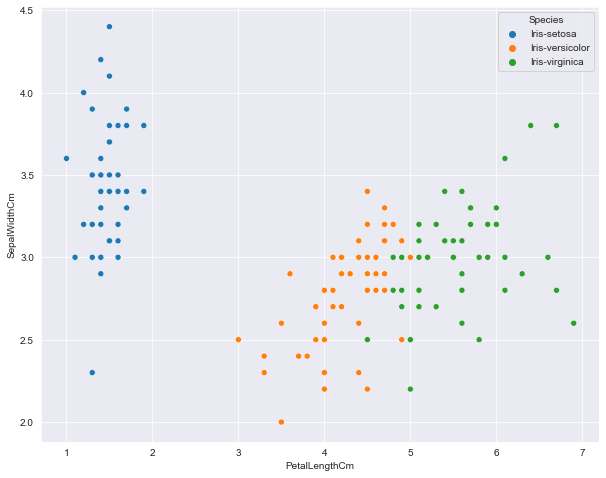

In [329]:
plt.subplots(figsize=(10,8))

sns.scatterplot( data=iris,x='PetalLengthCm',y='SepalWidthCm',hue='Species')

##### Processing the data

In [330]:
x, y = train_test_split(iris,test_size=0.2)

In [331]:
treinamento = x.to_numpy()
teste = y.to_numpy()
xTeste = []
yTeste = []
xTreinamento = []
yTreinamento = []
hueTrain = []
for i in range(len(teste)):
    xTeste.append(teste[i][3])
    yTeste.append(teste[i][2])
for i in range(len(treinamento)):
    xTreinamento.append(treinamento[i][3])
    yTreinamento.append(treinamento[i][2])
    hueTrain.append(treinamento[i][5])

<AxesSubplot:>

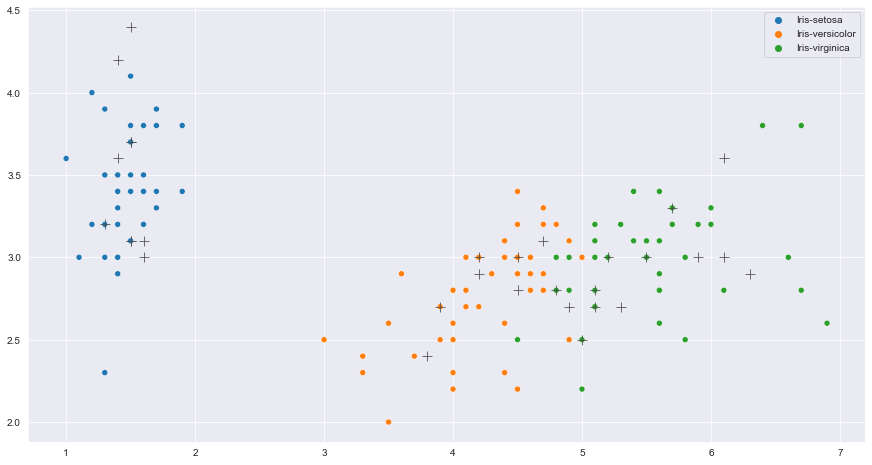

In [332]:
plt.subplots(figsize=(15,8))

sns.scatterplot(x=xTreinamento,y=yTreinamento,hue=hueTrain)
sns.scatterplot(x=xTeste,y=yTeste,marker="+",color="0.3",s=100)

##### Euclidian Distances

In [333]:
def distanciaEuclidiana(linha1, linha2):
    distancia = ((linha1[2] - linha2[2]) ** 2) + ((linha1[3] - linha2[3]) ** 2)
    return sqrt(distancia)

##### Getting the neighbors

In [334]:
def get_neighbors(treinamento, test_row, num_neighbors):
    distances = []
    for train_row in treinamento:
        dist = distanciaEuclidiana(test_row,train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tupla: tupla[1])
    return [distances[0:num_neighbors][0][0]]

##### KNN Classifier

In [335]:
def KNNClassification(treinamento, test_row, num_neighbors):
    neighbors = get_neighbors(treinamento, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = Counter(output_values).most_common()[0][0]
    return prediction

##### Making Predictions

In [336]:
def predict(treinamento, teste, k):
    colunas = []
    for especies in set(iris.Species):
        colunas.append(especies)
    matrix_confusao = pd.DataFrame(0, index=colunas, columns=colunas)
    inputData = []
    predictedData = []
    linha_de_erros = []

    for i in range(len(teste)):
        resultado = KNNClassification(treinamento, teste[i], k)
        inputData.append(teste[i][-1])
        predictedData.append(resultado)
        if(teste[i][-1] != resultado):
            linha_de_erros.append([teste[i],resultado])
        matrix_confusao.loc[teste[i][-1], resultado] = matrix_confusao.loc[teste[i][-1], resultado] + 1
    return inputData, predictedData, matrix_confusao, linha_de_erros

### K = 1

Confusion Matrix :

                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor                7               2            0
Iris-virginica                 0              11            0
Iris-setosa                    0               0           10

Acurácia:  0.9333333333333333
Recall:  [1.         0.77777778 1.        ]
Precisão:  [1.         1.         0.84615385]
F-score:  [1.         0.875      0.91666667]


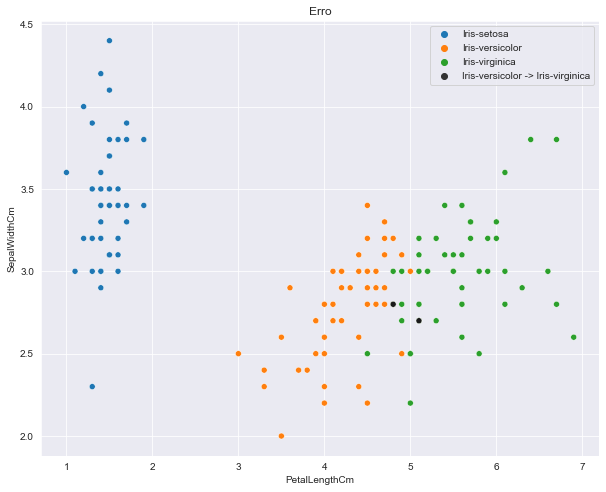

In [337]:
input1, predicted1, cm1,error = predict(treinamento,teste,1) # k = 1

print('Confusion Matrix :\n')
print(cm1)
if(len(error)):
    data = []
    x = []
    y = []
    style = []
    plt.subplots(figsize=(10,8))
    for i in range(len(error)):
        data.append(error[i][0])
        x.append(error[i][0][3])
        y.append(error[i][0][2])
        style.append(error[i][0][5]+' -> '+error[i][1])
    
    sns.scatterplot( data=iris,x='PetalLengthCm',y='SepalWidthCm',hue='Species')
    sns.scatterplot(x=x,y=y,color=".1",marker="s",style=style)
    plt.title("Erro")


print("\nAcurácia: ", accuracy_score(input1, predicted1))
print("Recall: ", recall_score(input1, predicted1, average=None))
print("Precisão: ", precision_score(input1, predicted1, average=None))
print("F-score: ", f1_score(input1, predicted1, average=None))

### K = 3

Confusion Matrix :

                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor                7               2            0
Iris-virginica                 0              11            0
Iris-setosa                    0               0           10

Acurácia:  0.9333333333333333
Recall:  [1.         0.77777778 1.        ]
Precisão:  [1.         1.         0.84615385]
F-score:  [1.         0.875      0.91666667]


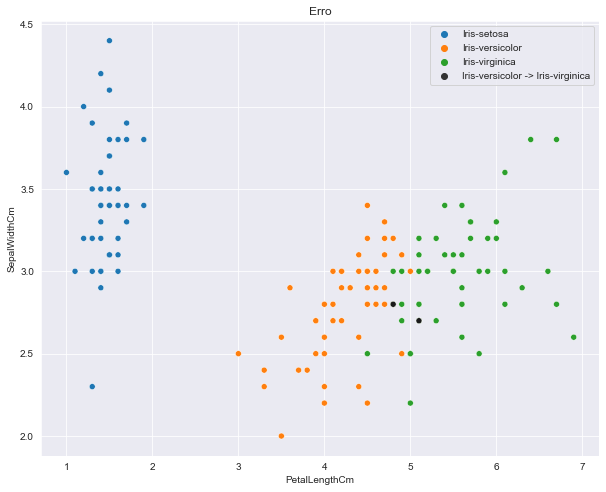

In [338]:
input3, predicted3, cm3,error = predict(treinamento,teste,3) # k = 3

print('Confusion Matrix :\n')
print(cm3)
if(len(error)):
    x = []
    y = []
    style = []
    plt.subplots(figsize=(10,8))
    for i in range(len(error)):
        x.append(error[i][0][3])
        y.append(error[i][0][2])
        style.append(error[i][0][5]+' -> '+error[i][1])
    
    sns.scatterplot(data=iris,x='PetalLengthCm',y='SepalWidthCm',hue='Species')
    sns.scatterplot(x=x,y=y,color=".1",marker="s",style=style)
    plt.title("Erro")

print("\nAcurácia: ", accuracy_score(input3, predicted3))
print("Recall: ", recall_score(input3, predicted3, average=None))
print("Precisão: ", precision_score(input3, predicted3, average=None))
print("F-score: ", f1_score(input3, predicted3, average=None))

### K = 5

Confusion Matrix :

                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor                7               2            0
Iris-virginica                 0              11            0
Iris-setosa                    0               0           10

Acurácia:  0.9333333333333333
Recall:  [1.         0.77777778 1.        ]
Precisão:  [1.         1.         0.84615385]
F-score:  [1.         0.875      0.91666667]


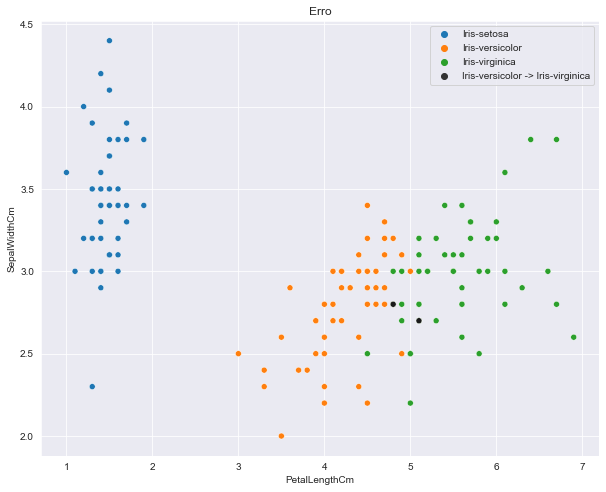

In [339]:
input5, predicted5, cm5,error = predict(treinamento,teste,5) # k = 5

print('Confusion Matrix :\n')
print(cm5)
if(len(error)):
    x = []
    y = []
    style = []
    plt.subplots(figsize=(10,8))
    for i in range(len(error)):
        x.append(error[i][0][3])
        y.append(error[i][0][2])
        style.append(error[i][0][5]+' -> '+error[i][1])
    
    sns.scatterplot( data=iris,x='PetalLengthCm',y='SepalWidthCm',hue='Species')
    sns.scatterplot(x=x,y=y,color=".1",marker="s",style=style)
    plt.title("Erro")

print("\nAcurácia: ", accuracy_score(input5, predicted5))
print("Recall: ", recall_score(input5, predicted5, average=None))
print("Precisão: ", precision_score(input5, predicted5, average=None))
print("F-score: ", f1_score(input5, predicted5, average=None))

### K = 7

Confusion Matrix :

                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor                7               2            0
Iris-virginica                 0              11            0
Iris-setosa                    0               0           10

Acurácia:  0.9333333333333333
Recall:  [1.         0.77777778 1.        ]
Precisão:  [1.         1.         0.84615385]
F-score:  [1.         0.875      0.91666667]


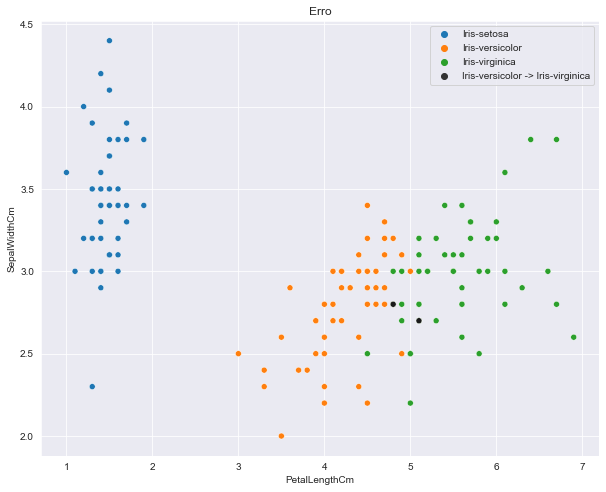

In [340]:
input7, predicted7, cm7,error = predict(treinamento,teste,7) # k = 7

print('Confusion Matrix :\n')
print(cm7)
if(len(error)):
    x = []
    y = []
    style = []
    plt.subplots(figsize=(10,8))
    for i in range(len(error)):
        x.append(error[i][0][3])
        y.append(error[i][0][2])
        style.append(error[i][0][5]+' -> '+error[i][1])
    
    sns.scatterplot( data=iris,x='PetalLengthCm',y='SepalWidthCm',hue='Species')
    sns.scatterplot(x=x,y=y,color=".1",marker="s",style=style)
    plt.title("Erro")

print("\nAcurácia: ", accuracy_score(input7, predicted7))
print("Recall: ", recall_score(input7, predicted7, average=None))
print("Precisão: ", precision_score(input7, predicted7, average=None))
print("F-score: ", f1_score(input7, predicted7, average=None))